# ***Fake News Detection***

In [2]:
# Installing Essential Libraries

# !pip install --upgrade tensorflow-gpu==2.0
# !pip install plotly 
# !pip install jupyterthemes
# !pip install nltk
# !pip install spacy
# !pip install WordCloud
# !pip install gensim

In [3]:
# Import Libraries

import gensim
import keras
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import seaborn as sns
import tensorflow as tf
import random
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer


In [4]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 6.6 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 9.9 MB 74.9 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 428 kB 53.1 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.4 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is 

In [5]:
# Import Specific Modules

from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from jupyterthemes import jtplot
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer


In [6]:
# Import Dataset

# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Required Settings

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [8]:
# NLTK Libraries
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# True News

df_true = pd.read_csv("/content/drive/MyDrive/fnd/True.csv",encoding= 'unicode_escape')

print("\nThis File Contain True News.\n")
df_true


This File Contain True News.



,title,text,subject,date
0,How Uddhav Thackeray's govt implements lessons...,Let the government learn instructive lessons a...,politicsNews,"September 22, 2021"
1,Goa 2022 polls: Arvind Kejriwal promises allow...,He also assured a monthly remuneration of Rs 5...,politicsNews,"September 22, 2021"
2,Maharashtra political climate heats up ahead o...,The MVA government seems to have taken a leaf ...,politicsNews,"September 22, 2021"
3,Karnataka assembly passes bill to stop temple ...,The proposed enactment 'Karnataka Religious St...,politicsNews,"September 22, 2021"
4,India sends Covishield vaccines to Bhutan & M...,India on Wednesday sent coronavirus vaccines t...,public,"September 22, 2021"
...,...,...,...,...
4993,U.S. lawmaker's controversial tweet on immigra...,WASHINGTON (Reuters) - U.S. Representative Ste...,politicsNews,"March 13, 2017"
4994,U.S. Agriculture secretary nominee submits eth...,(Reuters) - U.S. President Donald Trumpâs no...,politicsNews,"March 13, 2017"
4995,Trump aides attack agency that will analyze he...,WASHINGTON (Reuters) - Aides to U.S. President...,politicsNews,"March 12, 2017"
4996,Highlights: The Trump presidency on March 12 a...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"March 12, 2017"


In [10]:
# Fake News

df_fake = pd.read_csv("/content/drive/MyDrive/fnd/Fake.csv",encoding= 'unicode_escape')

print("\nThis File Contain fake News.\n")
df_fake


This File Contain fake News.



,title,text,subject,date
0,IT Intermediary Rules: Is the privacy of India...,Do the new IT Intermediary Rules have a chilli...,viral,"September 22, 2021"
1,UNESCO declares PM Modi best Prime Minister,UNESCO has been one of the primary alleged sou...,viral,"September 22, 2021"
2,"UNESCO declares new Rs 2,000 note best currenc...",Another fake UNESCO certificate for India touc...,viral,"September 22, 2021"
3,New notes have a GPS chip to detect black money,Another notebandi rumour proliferated when PM ...,viral,"September 22, 2021"
4,New notes have radioactive ink,Notebandi provided more fodder for fake news. ...,viral,"September 22, 2021"
...,...,...,...,...
4993,GOP Starts OPENLY Admitting That They Royally...,Trump s appointment of Breitbart chief Steve B...,News,"August 18, 2016"
4994,FBI Warns Republicans: Do Not Leak Clinton Em...,It s no secret Republicans are salivating to f...,News,"August 18, 2016"
4995,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016"
4996,WATCH: S.E. Cupp Destroys Trump Adviserâs â...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016"


In [11]:
# Checking Null Entries - True.csv

df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
# Checking Null Entries - False.csv

df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
# Adding a target class column to indicate whether the news is real or fake
df_true['isfake'] = 0
df_fake['isfake'] = 1

In [14]:
# True News after Adding target Class

print("\nUpdated True News.\n")
df_true


Updated True News.



,title,text,subject,date,isfake
0,How Uddhav Thackeray's govt implements lessons...,Let the government learn instructive lessons a...,politicsNews,"September 22, 2021",0
1,Goa 2022 polls: Arvind Kejriwal promises allow...,He also assured a monthly remuneration of Rs 5...,politicsNews,"September 22, 2021",0
2,Maharashtra political climate heats up ahead o...,The MVA government seems to have taken a leaf ...,politicsNews,"September 22, 2021",0
3,Karnataka assembly passes bill to stop temple ...,The proposed enactment 'Karnataka Religious St...,politicsNews,"September 22, 2021",0
4,India sends Covishield vaccines to Bhutan & M...,India on Wednesday sent coronavirus vaccines t...,public,"September 22, 2021",0
...,...,...,...,...,...
4993,U.S. lawmaker's controversial tweet on immigra...,WASHINGTON (Reuters) - U.S. Representative Ste...,politicsNews,"March 13, 2017",0
4994,U.S. Agriculture secretary nominee submits eth...,(Reuters) - U.S. President Donald Trumpâs no...,politicsNews,"March 13, 2017",0
4995,Trump aides attack agency that will analyze he...,WASHINGTON (Reuters) - Aides to U.S. President...,politicsNews,"March 12, 2017",0
4996,Highlights: The Trump presidency on March 12 a...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"March 12, 2017",0


In [15]:
# Fake News after Adding target Class

print("\nUpdated Fake News.\n")
df_fake


Updated Fake News.



,title,text,subject,date,isfake
0,IT Intermediary Rules: Is the privacy of India...,Do the new IT Intermediary Rules have a chilli...,viral,"September 22, 2021",1
1,UNESCO declares PM Modi best Prime Minister,UNESCO has been one of the primary alleged sou...,viral,"September 22, 2021",1
2,"UNESCO declares new Rs 2,000 note best currenc...",Another fake UNESCO certificate for India touc...,viral,"September 22, 2021",1
3,New notes have a GPS chip to detect black money,Another notebandi rumour proliferated when PM ...,viral,"September 22, 2021",1
4,New notes have radioactive ink,Notebandi provided more fodder for fake news. ...,viral,"September 22, 2021",1
...,...,...,...,...,...
4993,GOP Starts OPENLY Admitting That They Royally...,Trump s appointment of Breitbart chief Steve B...,News,"August 18, 2016",1
4994,FBI Warns Republicans: Do Not Leak Clinton Em...,It s no secret Republicans are salivating to f...,News,"August 18, 2016",1
4995,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",1
4996,WATCH: S.E. Cupp Destroys Trump Adviserâs â...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",1


In [16]:
# Creating Data Frame & Concatenating Real and Fake News

df = pd.concat([df_true, df_fake]).reset_index(drop = True)

print("\nThis Merged File Contains True & Fake News.\n")
df


This Merged File Contains True & Fake News.



,title,text,subject,date,isfake
0,How Uddhav Thackeray's govt implements lessons...,Let the government learn instructive lessons a...,politicsNews,"September 22, 2021",0
1,Goa 2022 polls: Arvind Kejriwal promises allow...,He also assured a monthly remuneration of Rs 5...,politicsNews,"September 22, 2021",0
2,Maharashtra political climate heats up ahead o...,The MVA government seems to have taken a leaf ...,politicsNews,"September 22, 2021",0
3,Karnataka assembly passes bill to stop temple ...,The proposed enactment 'Karnataka Religious St...,politicsNews,"September 22, 2021",0
4,India sends Covishield vaccines to Bhutan & M...,India on Wednesday sent coronavirus vaccines t...,public,"September 22, 2021",0
...,...,...,...,...,...
9991,GOP Starts OPENLY Admitting That They Royally...,Trump s appointment of Breitbart chief Steve B...,News,"August 18, 2016",1
9992,FBI Warns Republicans: Do Not Leak Clinton Em...,It s no secret Republicans are salivating to f...,News,"August 18, 2016",1
9993,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",1
9994,WATCH: S.E. Cupp Destroys Trump Adviserâs â...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",1


In [17]:
# Remove Unwanted Data

df.drop(columns = ['date'], inplace = True)

print("\nUpdated True & Fake News.\n")
df.head()


Updated True & Fake News.



,title,text,subject,isfake
0,How Uddhav Thackeray's govt implements lessons...,Let the government learn instructive lessons a...,politicsNews,0
1,Goa 2022 polls: Arvind Kejriwal promises allow...,He also assured a monthly remuneration of Rs 5...,politicsNews,0
2,Maharashtra political climate heats up ahead o...,The MVA government seems to have taken a leaf ...,politicsNews,0
3,Karnataka assembly passes bill to stop temple ...,The proposed enactment 'Karnataka Religious St...,politicsNews,0
4,India sends Covishield vaccines to Bhutan & M...,India on Wednesday sent coronavirus vaccines t...,public,0


In [18]:
# Creating New Column that Combines title and text together

df['original'] = df['title']+ ' ' +df['text']

print("\nUpdated True & Fake News.\n")
df.head()


Updated True & Fake News.



,title,text,subject,isfake,original
0,How Uddhav Thackeray's govt implements lessons...,Let the government learn instructive lessons a...,politicsNews,0,How Uddhav Thackeray's govt implements lessons...
1,Goa 2022 polls: Arvind Kejriwal promises allow...,He also assured a monthly remuneration of Rs 5...,politicsNews,0,Goa 2022 polls: Arvind Kejriwal promises allow...
2,Maharashtra political climate heats up ahead o...,The MVA government seems to have taken a leaf ...,politicsNews,0,Maharashtra political climate heats up ahead o...
3,Karnataka assembly passes bill to stop temple ...,The proposed enactment 'Karnataka Religious St...,politicsNews,0,Karnataka assembly passes bill to stop temple ...
4,India sends Covishield vaccines to Bhutan & M...,India on Wednesday sent coronavirus vaccines t...,public,0,India sends Covishield vaccines to Bhutan & M...


In [19]:
# Random Sample Entry from dataframe.

df_length = len(df['original'])

sampleentry = random.randint(1, df_length)

print("\nRandom Entry No.", sampleentry, " : \n")
print(df['original'][sampleentry])

# df['original'][01]

ognews = df['original'][sampleentry]


Random Entry No. 3874  : 

Bipartisan Illinois House group urges Senate to pass budget fix CHICAGO (Reuters) - A bipartisan group of 30 Illinois House members on Tuesday threw their support behind efforts in the Senate to craft a bill package aimed at ending the stateâs historic budget impasse. âWe ask the senators from both parties to pass the best negotiated package they can, and then we will take up their work in the House,â the group said in a statement.  The package, which includes tax hikes, pension changes and a local property tax freeze, stalled in the Democratic-led Senate in March, when most Republicans withdrew their support. John Patterson, a spokesman for Senate President John Cullerton, said on Tuesday both sides are âtrading ideas in trying to find agreement.â Illinois is limping toward the June 30 end of a second-straight fiscal year without a complete budget due to a standoff between its Republican governor and Democrats who control the legislature. Lawmaker

In [20]:
# Obtaining Additional Stopwords from NLTK
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [21]:
print("Stopwords : ", stop_words)

Stopwords :  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [22]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [23]:
# Apply the function to the dataframe

df['clean'] = df['original'].apply(preprocess)

print("\nUpdated True & Fake News.\n")
df.head()


Updated True & Fake News.



,title,text,subject,isfake,original,clean
0,How Uddhav Thackeray's govt implements lessons...,Let the government learn instructive lessons a...,politicsNews,0,How Uddhav Thackeray's govt implements lessons...,"[uddhav, thackeray, govt, implements, lessons,..."
1,Goa 2022 polls: Arvind Kejriwal promises allow...,He also assured a monthly remuneration of Rs 5...,politicsNews,0,Goa 2022 polls: Arvind Kejriwal promises allow...,"[polls, arvind, kejriwal, promises, allowance,..."
2,Maharashtra political climate heats up ahead o...,The MVA government seems to have taken a leaf ...,politicsNews,0,Maharashtra political climate heats up ahead o...,"[maharashtra, political, climate, heats, ahead..."
3,Karnataka assembly passes bill to stop temple ...,The proposed enactment 'Karnataka Religious St...,politicsNews,0,Karnataka assembly passes bill to stop temple ...,"[karnataka, assembly, passes, stop, temple, de..."
4,India sends Covishield vaccines to Bhutan & M...,India on Wednesday sent coronavirus vaccines t...,public,0,India sends Covishield vaccines to Bhutan & M...,"[india, sends, covishield, vaccines, bhutan, m..."


In [24]:
# Original News

print("\nBefore Removing Stopwords : ", ognews)


Before Removing Stopwords :  Bipartisan Illinois House group urges Senate to pass budget fix CHICAGO (Reuters) - A bipartisan group of 30 Illinois House members on Tuesday threw their support behind efforts in the Senate to craft a bill package aimed at ending the stateâs historic budget impasse. âWe ask the senators from both parties to pass the best negotiated package they can, and then we will take up their work in the House,â the group said in a statement.  The package, which includes tax hikes, pension changes and a local property tax freeze, stalled in the Democratic-led Senate in March, when most Republicans withdrew their support. John Patterson, a spokesman for Senate President John Cullerton, said on Tuesday both sides are âtrading ideas in trying to find agreement.â Illinois is limping toward the June 30 end of a second-straight fiscal year without a complete budget due to a standoff between its Republican governor and Democrats who control the legislature. Lawmak

In [25]:
# Tokens After Removing Stopwords

upnews = df['original'][sampleentry]

print("\nBefore Removing Stopwords : ", upnews)


Before Removing Stopwords :  Bipartisan Illinois House group urges Senate to pass budget fix CHICAGO (Reuters) - A bipartisan group of 30 Illinois House members on Tuesday threw their support behind efforts in the Senate to craft a bill package aimed at ending the stateâs historic budget impasse. âWe ask the senators from both parties to pass the best negotiated package they can, and then we will take up their work in the House,â the group said in a statement.  The package, which includes tax hikes, pension changes and a local property tax freeze, stalled in the Democratic-led Senate in March, when most Republicans withdrew their support. John Patterson, a spokesman for Senate President John Cullerton, said on Tuesday both sides are âtrading ideas in trying to find agreement.â Illinois is limping toward the June 30 end of a second-straight fiscal year without a complete budget due to a standoff between its Republican governor and Democrats who control the legislature. Lawmak

In [26]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
  for j in i:
    list_of_words.append(j)

print("\nAll Words in dataset : ", list_of_words[:100])
print("\nTotal Words Count from dataset : ", len(list_of_words))

# Obtain the total number of unique words
unique_words = list(set(list_of_words))
print("\nUnique Words in dataset : ", unique_words[:100])
print("\nTotal Unique Words Count from dataset : ", len(unique_words))


All Words in dataset :  ['uddhav', 'thackeray', 'govt', 'implements', 'lessons', 'coronavirus', 'outbreak', 'real', 'test', 'leadership', 'government', 'learn', 'instructive', 'lessons', 'hold', 'experience', 'coronavirus', 'real', 'test', 'uddhav', 'thackeray', 'statesmanship', 'true', 'legacy', 'state', 'polls', 'arvind', 'kejriwal', 'promises', 'allowance', 'unemployed', 'quota', 'jobs', 'locals', 'assured', 'monthly', 'remuneration', 'families', 'dependent', 'mining', 'tourism', 'industries', 'till', 'sectors', 'normalised', 'maharashtra', 'political', 'climate', 'heats', 'ahead', 'february', 'local', 'body', 'polls', 'government', 'taken', 'leaf', 'mamata', 'banerjee', 'feud', 'centre', 'dealing', 'conduct', 'probes', 'leaders', 'like', 'anil', 'deshmukh', 'anil', 'parab', 'state', 'uses', 'anti', 'corruption', 'bureau', 'karnataka', 'assembly', 'passes', 'stop', 'temple', 'demolition', 'proposed', 'enactment', 'karnataka', 'religious', 'structures', 'protection', 'aims', 'stop',

In [27]:
total_words = len(list(set(list_of_words)))
total_words

56250

In [28]:
# Join the Unique words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

print("\nUpdated True & Fake News.\n")
df.head()


Updated True & Fake News.



,title,text,subject,isfake,original,clean,clean_joined
0,How Uddhav Thackeray's govt implements lessons...,Let the government learn instructive lessons a...,politicsNews,0,How Uddhav Thackeray's govt implements lessons...,"[uddhav, thackeray, govt, implements, lessons,...",uddhav thackeray govt implements lessons coron...
1,Goa 2022 polls: Arvind Kejriwal promises allow...,He also assured a monthly remuneration of Rs 5...,politicsNews,0,Goa 2022 polls: Arvind Kejriwal promises allow...,"[polls, arvind, kejriwal, promises, allowance,...",polls arvind kejriwal promises allowance unemp...
2,Maharashtra political climate heats up ahead o...,The MVA government seems to have taken a leaf ...,politicsNews,0,Maharashtra political climate heats up ahead o...,"[maharashtra, political, climate, heats, ahead...",maharashtra political climate heats ahead febr...
3,Karnataka assembly passes bill to stop temple ...,The proposed enactment 'Karnataka Religious St...,politicsNews,0,Karnataka assembly passes bill to stop temple ...,"[karnataka, assembly, passes, stop, temple, de...",karnataka assembly passes stop temple demoliti...
4,India sends Covishield vaccines to Bhutan & M...,India on Wednesday sent coronavirus vaccines t...,public,0,India sends Covishield vaccines to Bhutan & M...,"[india, sends, covishield, vaccines, bhutan, m...",india sends covishield vaccines bhutan maldive...


In [29]:
# Updated News Entry

cjnews = df['clean_joined'][sampleentry]

print("\nAfter Removing Repeated Words : ", cjnews)


After Removing Repeated Words :  bipartisan illinois house group urges senate pass budget chicago reuters bipartisan group illinois house members tuesday threw support efforts senate craft package aimed ending stateâ historic budget impasse senators parties pass best negotiated package work house group said statement package includes hikes pension changes local property freeze stalled democratic senate march republicans withdrew support john patterson spokesman senate president john cullerton said tuesday sides trading ideas trying agreement illinois limping june second straight fiscal year complete budget standoff republican governor democrats control legislature lawmakers face deadline pass budget bills simple majority votes bipartisan house statement surfaced house speaker michael madigan monday urged governor bruce rauner restart budget negotiations appointed democrats chamber work deal chicago based civic federation nonpartisan government finance watchdog released report tuesday 


Number of samples in News Subject wise



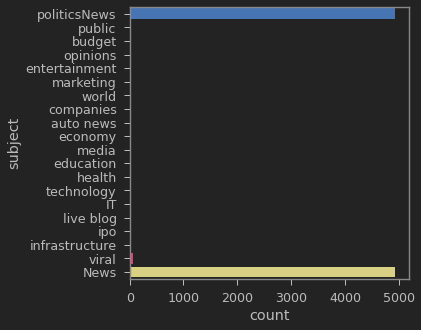

In [30]:
# Plot the Number of samples in News Subject wise

plt.figure(figsize = (5, 5))

print("\nNumber of samples in News Subject wise\n")
sns.countplot(y = "subject", data = df, )


Fake News - True News Ratio



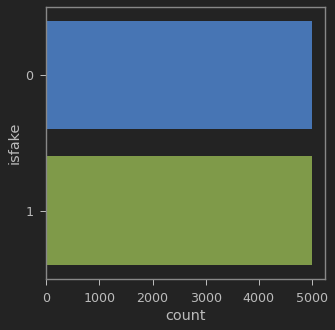

In [31]:
# Fake News - True News Ratio

plt.figure(figsize = (5, 5))

print("\nFake News - True News Ratio\n")
sns.countplot(y = "isfake", data = df)


True News - Wordcloud



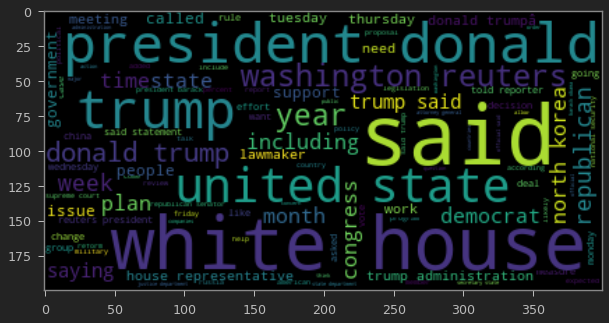

In [32]:
# True News - Wordcloud

plt.figure(figsize = (10,10))

wc = WordCloud(max_words = 100 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))

print("\nTrue News - Wordcloud\n")
plt.imshow(wc, interpolation = 'bilinear')


Fake News - Wordcloud



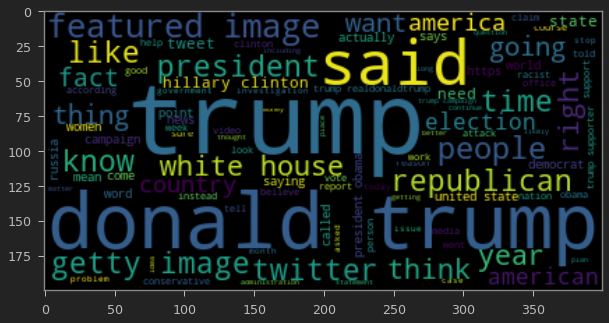

In [33]:
# Fake News - Wordcloud

plt.figure(figsize = (10,10))

wc = WordCloud(max_words = 100 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))

print("\nFake News - Wordcloud\n")
plt.imshow(wc, interpolation = 'bilinear')

In [34]:
nltk.word_tokenize(df['clean_joined'][0])

['uddhav',
 'thackeray',
 'govt',
 'implements',
 'lessons',
 'coronavirus',
 'outbreak',
 'real',
 'test',
 'leadership',
 'government',
 'learn',
 'instructive',
 'lessons',
 'hold',
 'experience',
 'coronavirus',
 'real',
 'test',
 'uddhav',
 'thackeray',
 'statesmanship',
 'true',
 'legacy',
 'state']

In [35]:
# Length of maximum document (News) will be needed to create word embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
      maxlen = len(tokens)
print("The maximum number of words in any document is=", maxlen)


The maximum number of words in any document is= 2042


In [36]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [37]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [38]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [39]:
len(train_sequences)

7996

In [40]:
train_sequences

[[12,
  4258,
  1468,
  3345,
  22,
  224,
  14,
  10,
  12,
  85,
  3811,
  437,
  1468,
  789,
  41,
  602,
  779,
  1,
  24,
  735,
  2519,
  22,
  564,
  7532,
  7533,
  8,
  93,
  340,
  4745,
  7343,
  185,
  437,
  1310,
  44,
  1622,
  330,
  3166,
  664,
  11,
  192,
  7343,
  776,
  2853,
  4375,
  123,
  404,
  17792,
  3,
  203,
  22,
  86,
  1071,
  11,
  2482,
  143,
  2519,
  271,
  22,
  564,
  65,
  3630,
  3279,
  224,
  6823,
  5455,
  2520,
  664,
  2454,
  464,
  605,
  537,
  427,
  12,
  407,
  44,
  14832,
  226,
  6266,
  293,
  697,
  770,
  312,
  240,
  1468,
  94,
  544,
  779,
  27,
  17793,
  62,
  1395,
  7343,
  23308,
  12174,
  2,
  8438,
  944,
  79,
  401,
  5039,
  1922,
  45,
  131,
  1276,
  335,
  853,
  12899,
  1049,
  450,
  2590,
  1,
  86,
  302,
  164,
  2,
  165,
  2483,
  972,
  564,
  1979,
  358,
  2,
  1579,
  4023,
  113,
  5295,
  224,
  246,
  972,
  434,
  414,
  3892,
  1854,
  246,
  434,
  58,
  564,
  46,
  1759,
  11,
  609,


In [41]:
len(test_sequences)

2000

In [42]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 uddhav thackeray govt implements lessons coronavirus outbreak real test leadership government learn instructive lessons hold experience coronavirus real test uddhav thackeray statesmanship true legacy state 
 is :  [12, 4258, 1468, 3345, 22, 224, 14, 10, 12, 85, 3811, 437, 1468, 789, 41, 602, 779, 1, 24, 735, 2519, 22, 564, 7532, 7533, 8, 93, 340, 4745, 7343, 185, 437, 1310, 44, 1622, 330, 3166, 664, 11, 192, 7343, 776, 2853, 4375, 123, 404, 17792, 3, 203, 22, 86, 1071, 11, 2482, 143, 2519, 271, 22, 564, 65, 3630, 3279, 224, 6823, 5455, 2520, 664, 2454, 464, 605, 537, 427, 12, 407, 44, 14832, 226, 6266, 293, 697, 770, 312, 240, 1468, 94, 544, 779, 27, 17793, 62, 1395, 7343, 23308, 12174, 2, 8438, 944, 79, 401, 5039, 1922, 45, 131, 1276, 335, 853, 12899, 1049, 450, 2590, 1, 86, 302, 164, 2, 165, 2483, 972, 564, 1979, 358, 2, 1579, 4023, 113, 5295, 224, 246, 972, 434, 414, 3892, 1854, 246, 434, 58, 564, 46, 1759, 11, 609, 14832, 7343, 107, 1517, 2853, 286, 1483

In [43]:
# Add padding can either be maxlen = 4405 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences, maxlen = 4405, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 4405, truncating = 'post')

In [44]:
for i,doc in enumerate(padded_train[:2]):
  print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [  12 4258 1468 ...    0    0    0]
The padded encoding for document 2  is :  [151  93 539 ...   0   0   0]


In [45]:
# Sequential Model
model = Sequential()

#embedding layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN/LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         7200000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 7,496,193
Trainable params: 7,496,193
Non-trainable params: 0
_________________________________________________________________


In [46]:
total_words

56250

In [47]:
y_train = np.asarray(y_train)

In [ ]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 3)

Epoch 1/3
113/113 [==============================] - 2688s 24s/step - loss: 0.1607 - acc: 0.9280 - val_loss: 0.0173 - val_acc: 0.9950
Epoch 2/3
113/113 [==============================] - 2644s 23s/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0077 - val_acc: 0.9962
Epoch 3/3
  3/113 [..............................] - ETA: 42:08 - loss: 1.6458e-04 - acc: 1.0000

In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
  if pred[i].item() > 0.5:
    prediction.append(1)
  else:
    prediction.append(0)

In [ ]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test),prediction)

print("Model Accuracy : ", accuracy) 

In [ ]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (15,15))
sns.heatmap(cm, annot = True)

In [ ]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)
# from sklearn.tree import DecisionTreeClassifier
# DT = DecisionTreeClassifier()
# DT.fit(xv_train,y_train)
# from sklearn.ensemble import GradientBoostingClassifier
# GBC = GradientBoostingClassifier()
# GBC.fit(xv_train,y_train)
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(xv_train,y_train)

In [ ]:
def output_label(n):
    if n ==0:
        return "True News"
    elif n==1:
        return "Fake News"
    else:
        return "ERROR!!"
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)
    new_x_test = new_def_test['text']
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    
    return print(f'''\n
                    LR Prediction: {output_label(pred_LR)}\n
                    DT Prediction: {output_label(pred_DT)}\n
                    RFC Prediction: {output_label(pred_RFC)}\n
                 ''')

In [ ]:
news = str(input())
manual_testing(news)